# Testes de hipóteses com bootstrap

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
lift = 1.1
test = np.random.binomial(100, p=0.2 * lift, size=10000)
ctrl = np.random.binomial(100, p=0.2, size=50000)

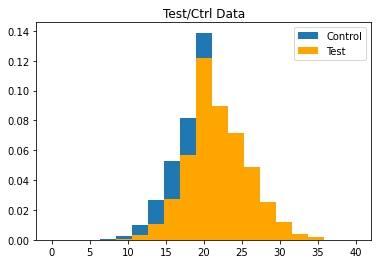

In [3]:
bins = np.linspace(0, 40, 20)

plt.hist(ctrl, bins=bins, label='Control', density=True)
plt.hist(test, bins=bins, label='Test', color='orange', density=True)
plt.title('Test/Ctrl Data')
plt.legend()

In [4]:
from scipy import stats
print("teste: {0}".format(stats.describe(test)))
print("control: {0}".format(stats.describe(ctrl)))

teste: DescribeResult(nobs=10000, minmax=(6, 38), mean=21.9539, variance=17.055080298029804, skewness=0.13257115667951033, kurtosis=-0.02204116532687639)
control: DescribeResult(nobs=50000, minmax=(6, 37), mean=19.9658, variance=15.938589131782637, skewness=0.1425885501383121, kurtosis=-0.003853687031587505)


In [5]:
def boostrapper(A_vec, B_vec, sample_size, resample):
    A_avg_vec = A_vec[(np.random.rand(resample, sample_size)*len(A_vec)).astype(int)].mean(axis = 1)
    B_avg_vec = B_vec[(np.random.rand(resample, sample_size)*len(B_vec)).astype(int)].mean(axis = 1)
    return A_avg_vec, B_avg_vec

In [6]:
A_avg_vec, B_avg_vec = boostrapper(test, ctrl, 100, 500)

Distribuição a posterior aproximada dos parâmetros!

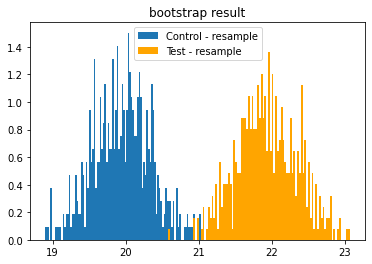

In [7]:
bins = 100

plt.hist(B_avg_vec, bins=bins, label='Control - resample', density=True)
plt.hist(A_avg_vec, bins=bins, label='Test - resample', color='orange', density=True)
plt.title('bootstrap result')
plt.legend()

In [8]:
print("teste: {0}".format(stats.describe(A_avg_vec)))
print("control: {0}".format(stats.describe(B_avg_vec)))

teste: DescribeResult(nobs=500, minmax=(20.58, 23.07), mean=21.93428, variance=0.1724133082164329, skewness=0.04877790893627575, kurtosis=-0.23297744174664325)
control: DescribeResult(nobs=500, minmax=(18.9, 21.03), mean=19.94676, variance=0.15808807855711426, skewness=0.003345081237958141, kurtosis=-0.15707047283603703)


In [9]:
#realizando o teste após o bootstap

In [10]:
from scipy import stats
stats.ttest_ind(A_avg_vec,B_avg_vec)

Ttest_indResult(statistic=77.30540623124135, pvalue=0.0)

# agora testando com dados assimétricos

In [11]:
lift = 1.3

test = np.random.gamma(shape = 5*lift, scale = 1/4, size=10000)
ctrl = np.random.gamma(shape = 5, scale = 1/4, size=50000)

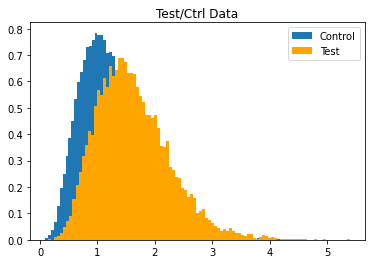

In [12]:
bins = 100

plt.hist(ctrl, bins=bins, label='Control', density=True)
plt.hist(test, bins=bins, label='Test', color='orange', density=True)
plt.title('Test/Ctrl Data')
plt.legend()

In [13]:
from scipy import stats
print("teste: {0}".format(stats.describe(test)))
print("control: {0}".format(stats.describe(ctrl)))

teste: DescribeResult(nobs=10000, minmax=(0.1462202922277261, 5.396123251490009), mean=1.6237062067477086, variance=0.4038585521563141, skewness=0.7852205964516865, kurtosis=0.9429133558744378)
control: DescribeResult(nobs=50000, minmax=(0.09217632058028837, 5.145138931336984), mean=1.25367058905945, variance=0.31506637578172364, skewness=0.9067934944995134, kurtosis=1.317270879122126)


In [14]:
def boostrapper(A_vec, B_vec, sample_size, resample):
    A_avg_vec = A_vec[(np.random.rand(resample, sample_size)*len(A_vec)).astype(int)].mean(axis = 1)
    B_avg_vec = B_vec[(np.random.rand(resample, sample_size)*len(B_vec)).astype(int)].mean(axis = 1)
    return A_avg_vec, B_avg_vec

In [15]:
A_avg_vec, B_avg_vec = boostrapper(test, ctrl, 100, 500)

Distribuição a posterior aproximada dos parâmetros!

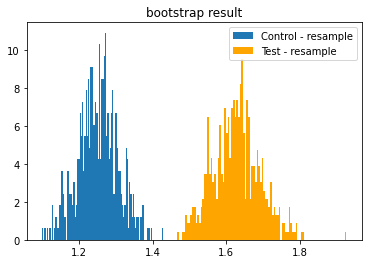

In [16]:
bins = 100

plt.hist(B_avg_vec, bins=bins, label='Control - resample', density=True)
plt.hist(A_avg_vec, bins=bins, label='Test - resample', color='orange', density=True)
plt.title('bootstrap result')
plt.legend()

In [17]:
#probabilidade da diferença entre A e B ser maior que zero.
sum(A_avg_vec - B_avg_vec > 0)/len(A_avg_vec)

1.0

In [18]:
#realizando o teste após o bootstap

In [19]:
from scipy import stats
stats.ttest_ind(A_avg_vec,B_avg_vec)

Ttest_indResult(statistic=99.34623144995626, pvalue=0.0)